# **Prétraitement des données :**

1. **Monter Google Drive dans Google Colab**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/datte'

Mounted at /content/drive


2. **Importation des Bibliothèques**

---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

3. **Affichage une Image par Catégorie et le nombre des images pour chaque dossier (Categorie)**

---



Dossier : Medjool, Nombre des image : 135


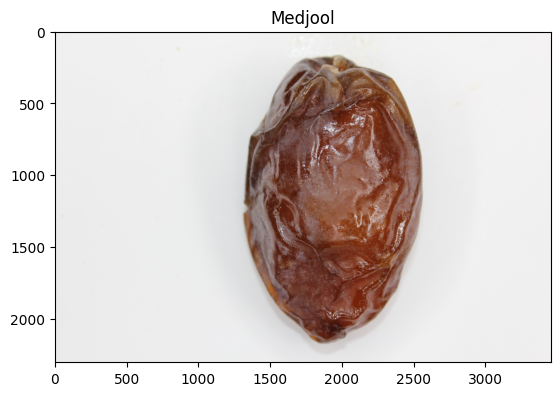

Dossier : Sugaey, Nombre des image : 168


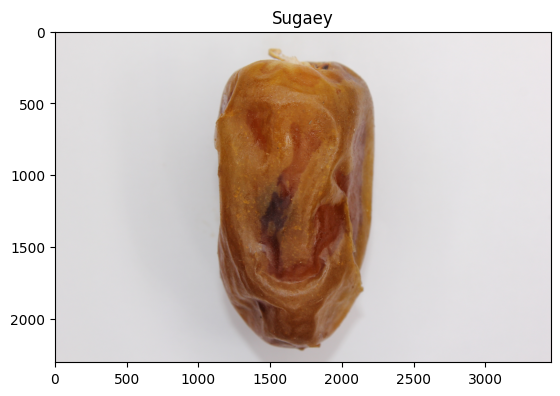

Dossier : Ajwa, Nombre des image : 175


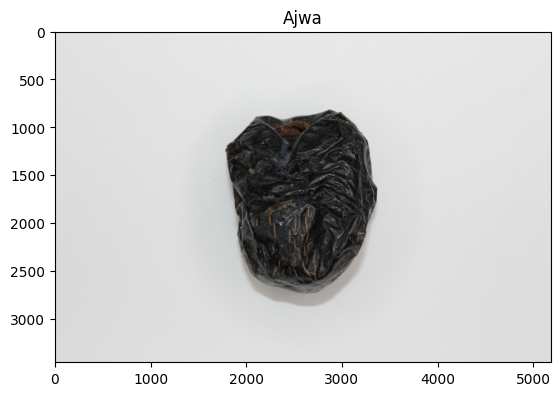

Dossier : Shaishe, Nombre des image : 171


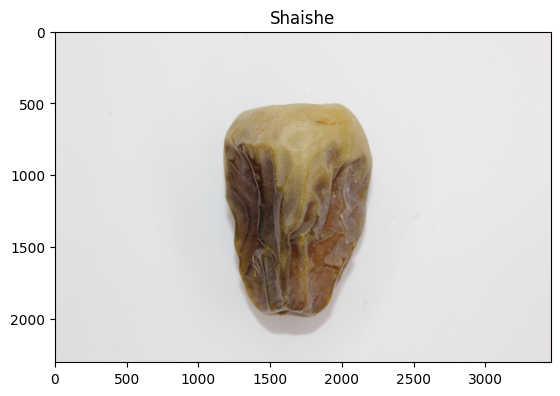

Dossier : Nabtat Ali, Nombre des image : 177


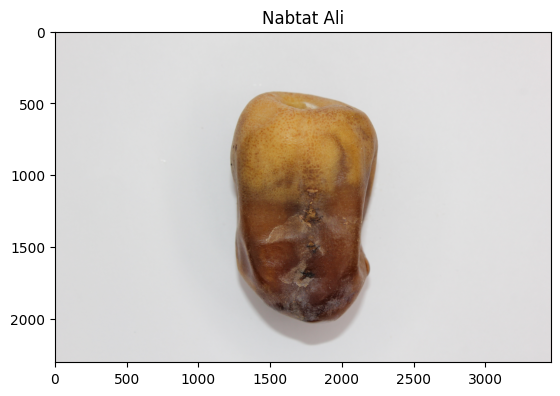

Dossier : Rutab, Nombre des image : 146


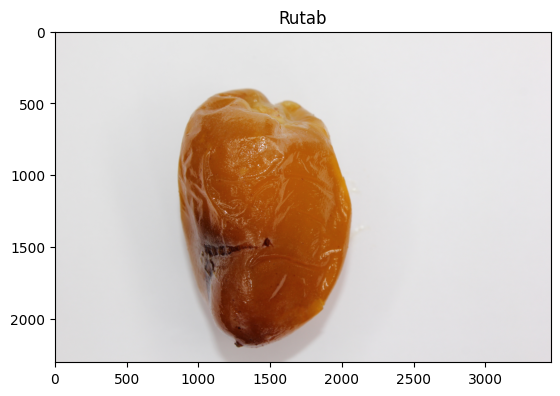

Dossier : Meneifi, Nombre des image : 232


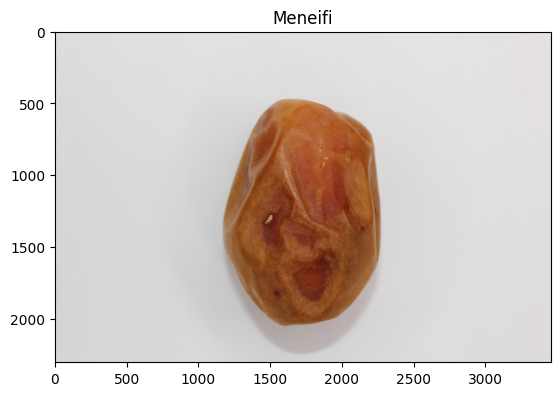

Dossier : Sokari, Nombre des image : 264


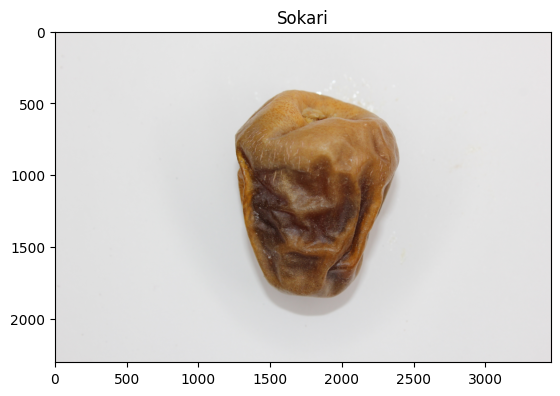

Dossier : Galaxy, Nombre des image : 190


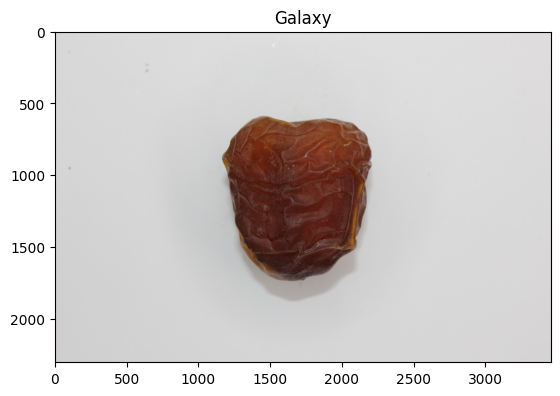

In [3]:
folders = os.listdir(data_dir)

for folder in folders:
    images = os.listdir(os.path.join(data_dir, folder))
    print(f"Dossier : {folder}, Nombre des image : {len(images)}")
    img_path = os.path.join(data_dir, folder, images[0])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(folder)
    plt.show()

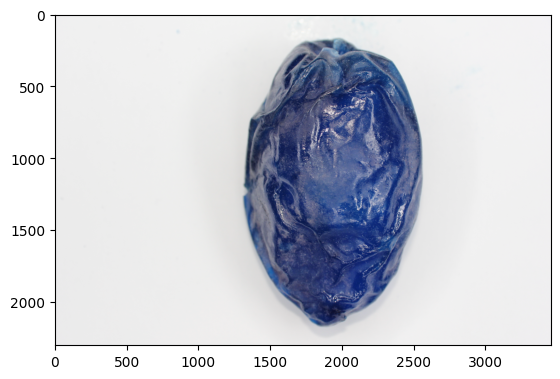

In [4]:
CATEGORIES = ['Medjool', 'Shaishe', 'Rutab', 'Nabtat Ali', 'Sokari', 'Meneifi', 'Sugaey','Galaxy','Ajwa']

for categorie in CATEGORIES:
    path=os.path.join(data_dir, categorie)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

4. **Extraction des Matrices à partir des Images**

---



In [5]:
training_data=[]
IMG_SIZE=224

for category in CATEGORIES:
        path=os.path.join(data_dir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
print(len(training_data))
lenofimage = len(training_data)


1658


In [7]:

print(f"Dimensions de la liste training data: {len(training_data[0][0])}x{len(training_data[0][0][0])}x{len(training_data[0][0][0][0])}")


Dimensions de la liste training data: 224x224x3


array([[[238, 238, 239],
        [239, 239, 239],
        [239, 238, 240],
        ...,
        [243, 242, 245],
        [243, 242, 246],
        [242, 243, 245]],

       [[238, 237, 239],
        [240, 239, 240],
        [240, 240, 240],
        ...,
        [242, 242, 242],
        [243, 242, 244],
        [242, 241, 243]],

       [[238, 238, 239],
        [240, 239, 241],
        [240, 239, 241],
        ...,
        [243, 242, 244],
        [243, 242, 244],
        [243, 242, 244]],

       ...,

       [[236, 235, 237],
        [234, 233, 235],
        [237, 237, 237],
        ...,
        [240, 239, 241],
        [240, 239, 241],
        [239, 238, 240]],

       [[235, 234, 236],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [238, 237, 239],
        [239, 238, 240],
        [237, 236, 240]],

       [[234, 234, 235],
        [234, 233, 235],
        [234, 234, 234],
        ...,
        [239, 239, 239],
        [238, 237, 240],
        [237, 236, 240]]], dtype=uint8)
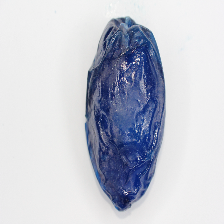

In [8]:
training_data[0][0]

5. **Analyse des Données**

---



In [9]:

df = pd.DataFrame(training_data, columns=["image", "class"])

print(df.isnull().sum())
print("la taille de df est : ",df.shape)
print(df.head())




image    0
class    0
dtype: int64
la taille de df est :  (1658, 2)
                                               image  class
0  [[[238, 238, 239], [239, 239, 239], [239, 238,...      0
1  [[[229, 228, 232], [229, 231, 232], [230, 229,...      0
2  [[[220, 219, 223], [221, 220, 224], [221, 220,...      0
3  [[[234, 235, 239], [237, 236, 238], [238, 237,...      0
4  [[[247, 246, 248], [247, 247, 247], [247, 247,...      0


6. **Préparation des Données pour l'Entraînement**

---









In [10]:
X=[]
y=[]
lenofimage = len(training_data)

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [11]:
X.shape



(1658, 150528)


7. **Normalisation des Données**

---



In [12]:
X = X/255.0

In [13]:
X[1]


array([0.89803922, 0.89411765, 0.90980392, ..., 0.89411765, 0.89019608,
       0.89803922])

In [14]:
y=np.array(y)

In [15]:
y.shape


(1658,)

8.  **Partitionnement du Dataset en ensembles d'Entraînement et de Test**

---



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1326, 150528)
y_train shape: (1326,)
X_test shape: (332, 150528)
y_test shape: (332,)


# **Entraînement du Modèle**




In [17]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

# **Évaluation des Performances du Modèle**





In [18]:
y2 = svc.predict(X_test)

In [19]:
print("Précision sur les données de test :",accuracy_score(y_test,y2))

Précision sur les données de test : 0.8855421686746988


In [20]:
print(classification_report(y_test,y2,target_names=CATEGORIES))

              precision    recall  f1-score   support

     Medjool       0.96      0.85      0.90        27
     Shaishe       0.93      1.00      0.96        38
       Rutab       0.82      0.87      0.85        38
  Nabtat Ali       0.89      0.77      0.83        44
      Sokari       0.91      0.91      0.91        45
     Meneifi       0.83      0.82      0.82        49
      Sugaey       0.79      0.88      0.83        34
      Galaxy       0.89      0.93      0.91        27
        Ajwa       1.00      1.00      1.00        30

    accuracy                           0.89       332
   macro avg       0.89      0.89      0.89       332
weighted avg       0.89      0.89      0.89       332



3. **Matrice de confusion**

---



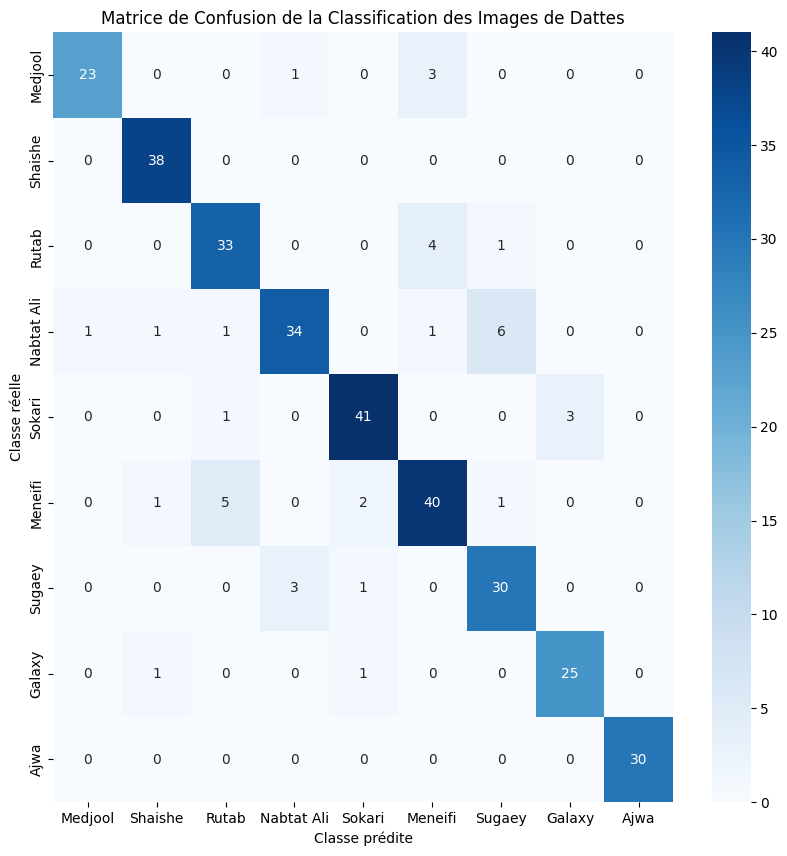

In [21]:


cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.title('Matrice de Confusion de la Classification des Images de Dattes')
plt.show()


In [22]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [10],
    'gamma': [1],
    'kernel': ['linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.887 total time= 2.5min
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.857 total time= 2.9min
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.887 total time= 2.6min
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.917 total time= 2.7min
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.909 total time= 2.7min
{'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy on test set: 0.8855421686746988
